<b><font size=20, color='#A020F0'>Scipy</font></b>

Hannah Zanowski<br>
9/26/22<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Become familiar with the various modules available in Scipy for doing scientific analyses
2. Review examples of some of the more useful Scipy tools and functions

#### Resources

<b>Learning about numpy and matplotlib:</b><br>
[Scipy website](https://scipy.org/)<br>
[Scipy User Guide](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide)<br>

# A little about Scipy

Scipy is a python package that houses various functions that are useful for math, science, and engineering applications. It includes algorithms for all sorts of useful stuff, from optimization to interpolation, differential equations, and statistics. It is more or less an extension of numpy but with some more advanced tools and a few extra data structures for data analysis.

Scipy contains the following modules:
1. Special functions: `scipy.special`
2. Integration: `scipy.integrate`
3. Optimization: `scipy.optimize`
4. Interpolation: `scipy.interpolate`
5. Fourier Transforms: `scipy.fft`
6. Signal Processing: `scipy.signal`
7. Linear Algebra: `scipy.linalg`
8. Compressed Sparse Graph Routines: `scipy.sparse.csgraph`
9. ARPACK for sparse eignevalue problems
10. Spatial data structures and algorithms: `scipy.spatial`
11. Statistics: `scipy.stats`
12. Multidimensional image processing: `scipy.ndimage`
13. File IO: `scipy.io`

# Reading files with Scipy

Like numpy, Scipy has a module for reading and writing output called [scipy.io](https://docs.scipy.org/doc/scipy/tutorial/io.html). I don't often use scipy for I/O purposes because there are typically much better tools out there for what it can read in. Regardless, you can use scipy.io for a number of different filetypes including, `.mat` (MATLAB), `.nc` (netCDF), `.wav` (sound files). You'll get a chance to use scipy.io to read in a .wav file as part of your homework.

# Using scipy modules for data analysis
Below we'll cover examples from a subset of the scipy modules so you can see what functions exist in each.

Let's begin by importing the scipy modules and a few other packages we'll need for today:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,signal,interpolate,integrate,linalg,fft

### scipy.stats
[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statsrefmanual) contains functions for doing statistics; it has tools for working with [discrete](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions) and [continuous](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) probablity distributions, correlation functions, summary + frequency statistics, statistical tests, etc. You are already familiar with a couple of scipy.stats function (e.g., `pearsonr()` and `linregress()`), which you used in your first in class notebook.

Below we'll get some practice working with [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) and [scipy.stats.pdf](). 

First, let's generate some data and plot a histogram:

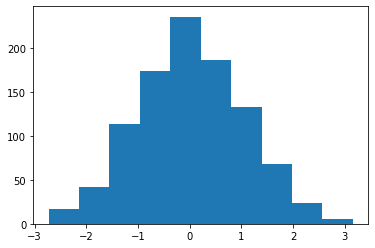

In [6]:
data=stats.norm.rvs(loc=0, scale=1, size=1000, random_state=None)
plt.hist(data);

Now let's add an actual pdf to the plot. To do that we need to do the following:

In [8]:
#Create an x-axis variable that spans the normal distribution
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 100) 
#ppf=percent point function--this means get the percentiles!

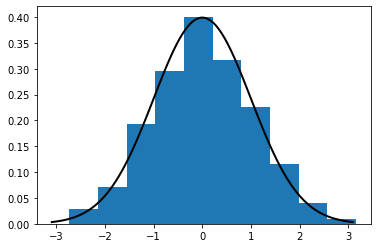

In [9]:
plt.hist(data,density=True) #density=True tells hist to plot your y-values as densities rather than counts!
plt.gca().plot(x, stats.norm.pdf(x),'k', lw=2)

You can also compute and plot the cumulative distribution:

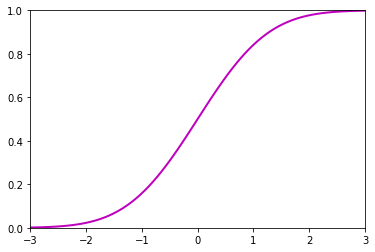

In [10]:
plt.plot(x, stats.norm.cdf(x),'m', lw=2)
plt.ylim(0,1);
plt.xlim(-3,3);

You can do statistical testing as well. Let's assume that the data we created above is our true distribution. We'll create another normal distribution below that will be our sample distribution:

In [11]:
sample=stats.norm.rvs(loc=5, scale=1, size=100, random_state=None)

Let's plot both histograms to see how they compare:

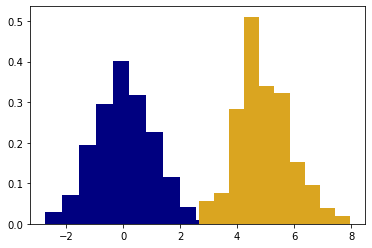

In [12]:
plt.hist(data,density=True,color='navy');
plt.hist(sample,density=True,color='goldenrod');

Now let's calcualte a t-statistic using a [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy-stats-ttest-1samp) to see if our sample mean is different from the "population" mean (which is zero):

In [13]:
stats.ttest_1samp(sample,popmean=0)

Ttest_1sampResult(statistic=53.37242654485693, pvalue=9.024598806583752e-75)

### scipy.signal
[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) is useful for all things signal processing. I often use it for [filtering](https://docs.scipy.org/doc/scipy/reference/signal.html#filtering) time series, [convolutions](https://en.wikipedia.org/wiki/Convolution), and [detrending](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html). For the examples that follow, let's read in our Nino3.4 data from last week's notebook. If you don't have the data anymore you can run the following command to download it again: 

```!curl -O https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt```

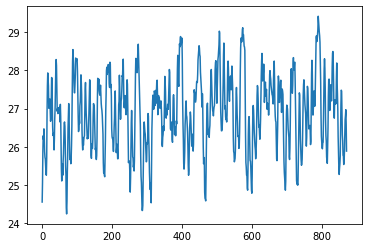

In [2]:
#nino34=np.genfromtxt('../InClass/detrend.nino34.ascii.txt',skip_header=1)
nino34=np.genfromtxt('../../AOS573_Solutions/Notebooks/detrend.nino34.ascii.txt',skip_header=1)
sst=nino34[:,2] #sst
ssta=nino34[:,-1] #sst anomaly
plt.plot(sst)

Let's [detrend](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html) the Nino3.4 SSTs:

In [15]:
n34_detrend=signal.detrend(sst)

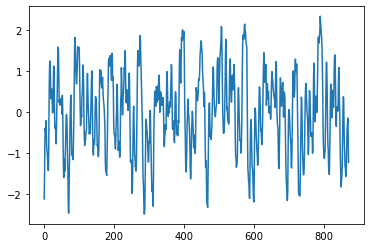

In [16]:
plt.plot(n34_detrend)
#plt.plot(ssta)

Now let's filter the time series so that only variations with time scales longer than 1 year are kept. As an example, we'll build a [Butterworth](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy-signal-butter) filter to do this, which generally does well for low-frequency signals:

In [17]:
b,a=signal.butter(5, 2*np.pi*12/len(n34_detrend), 'lowpass') #design the filter
n34_filtered=signal.filtfilt(b, a, n34_detrend) #apply filter to the data, in this case with a forward backward filter

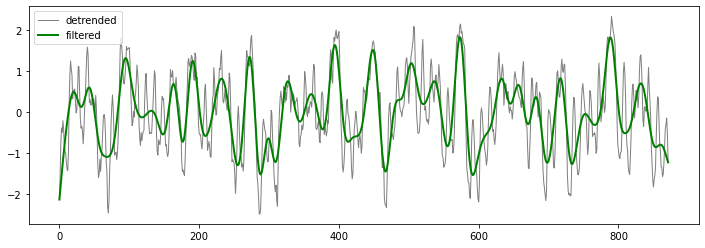

In [18]:
fig,ax=plt.subplots()
fig.set_size_inches(12,4)
plt.plot(n34_detrend,color='0.5',lw=1,label='detrended')
plt.plot(n34_filtered,color='g',lw=2,label='filtered')
plt.legend()

At the end of the day filtering is effectively a convolution. For example, we can apply a [boxcar filter](https://en.wikipedia.org/wiki/Boxcar_function) (a rolling mean) to our Nino3.4 time series by [convolving](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html#scipy-signal-convolve) the time series with the boxcar filter:

In [19]:
bxfilt=[1/3,1/3,1/3] #3 time steps, equal weights (these are normalized)
n34_rolling=signal.convolve(n34_detrend,bxfilt,mode='valid')

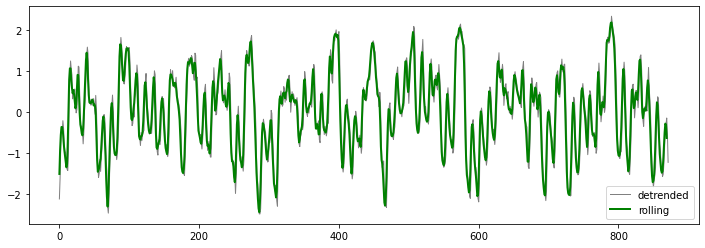

In [20]:
fig,ax=plt.subplots()
fig.set_size_inches(12,4)
plt.plot(n34_detrend,color='0.5',lw=1,label='detrended')
plt.plot(n34_rolling,color='g',lw=2,label='rolling')
plt.legend()

### scipy.fft
You can also do discrete [Fourier Transforms](https://en.wikipedia.org/wiki/Fourier_transform) with [scipy.fft](https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft). Let's transform our Nino3.4 sst anomalies using [fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy-fft-fft):

In [4]:
nino34_fft=fft.fft(ssta)

Text(0.5, 0, 'Frequency (months$^{-1}$)')

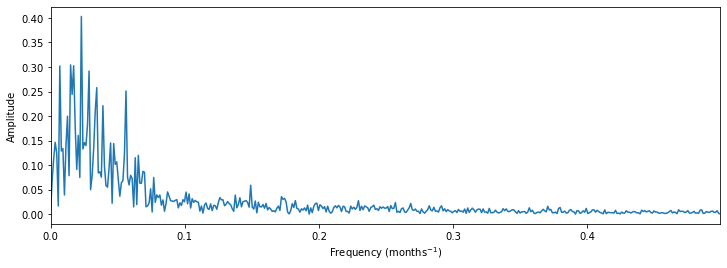

In [21]:
tstep=1 #data is monthly--this is your sampling rate
N=len(ssta)
freq=fft.fftfreq(N,tstep)[:(N//2)] #get the frequencies for the x axis of the plot
fig,ax=plt.subplots()
fig.set_size_inches(12,4)
plt.plot(freq,(2.0/N)*np.abs(nino34_fft[0:(N//2)])) #2/N is a normalization factor
plt.xlim(freq[0],freq[-1]);
plt.ylabel('Amplitude')
plt.xlabel('Frequency (months$^{-1}$)')

### scipy.linalg

We can also do linear algebra in scipy using [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html#linear-algebra-scipy-linalg). Let's make a matrix and do some computations on it:

In [46]:
M=np.array([[1,0,5],[-1,3,8],[6,-5,-2]])
M

array([[ 1,  0,  5],
       [-1,  3,  8],
       [ 6, -5, -2]])

We can compute the inverse and determinant (if you want to calculate the trace that's in numpy!)

In [47]:
linalg.inv(M)

array([[-1.09677419,  0.80645161,  0.48387097],
       [-1.48387097,  1.03225806,  0.41935484],
       [ 0.41935484, -0.16129032, -0.09677419]])

In [48]:
linalg.det(M)

-30.99999999999999

We can also decompose matrices. Here's an example of a [singular value decomposition](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd). This is really useful if you need to calculate empirical orthogonal functions!

Below U is the left singular vectors, V is the right singular vectors, and L is the sorted singular values

In [49]:
U,L,V=linalg.svd(M)
L

array([10.88599976,  6.80587513,  0.41841707])

### scipy.integrate
As its name suggests, [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) contains useful tools for integrating functions. There is support for computing definite and indefinite integrals. Let's set up an example:

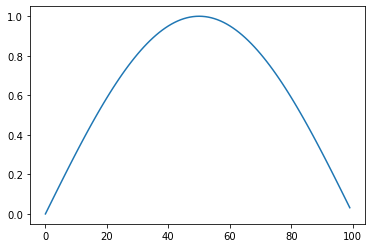

In [50]:
x=np.arange(0,100,1)
y=np.sin(2*np.pi*x/len(x)/2)
plt.plot(x,y)

Say we want to integrate the area under the curve we created. In reality we would probably do this analytically because there is a simple solution, but how would we do so numerically? That's where scipy.integrate comes in. We'll do a definite integral using [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) as an example:

In [51]:
yint=integrate.simpson(y)
yint

63.64626832662662

We can also cumulatively integrate. Here's an example using the [Trapezoid Rule](https://en.wikipedia.org/wiki/Trapezoidal_rule):

In [52]:
yintt=integrate.cumulative_trapezoid(y)

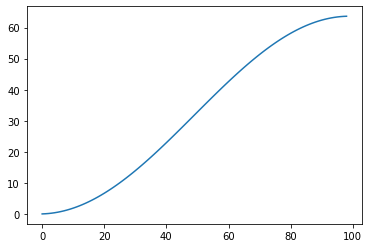

In [53]:
plt.plot(x[:-1],yintt)

### scipy.interpolate
[scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) as many different algorithms for interpolating.

Let's use [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) to interpolate our Nino3.4 data. In this example we'll shift our monthly sst anomalies by half a month:

In [54]:
months=np.arange(0,len(ssta)) #original months
new_months=np.arange(0.5,len(ssta),1) #new months
#create the interpolate function
f=interpolate.interp1d(months,ssta,kind='linear') 
#apply the interpolation function
ssta_interp=f(new_months[:-1])

Let's look at a subset of our original data and the interpolated data to see what happened:

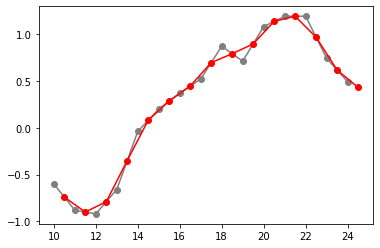

In [55]:
plt.plot(months[10:25],ssta[10:25],label='original',color='0.5',marker='o')
plt.plot(new_months[10:25],ssta_interp[10:25],label='interpolated',color='red',marker='o')

Here's the same example using a different interpolation function, a [CubicSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) (piecewise cubic polynomials):

In [56]:
months=np.arange(0,len(ssta)) #original months
new_months=np.arange(0.5,len(ssta),1) #new months
#create the interpolate function
f=interpolate.CubicSpline(months,ssta,extrapolate='True') 
#apply the interpolation function
ssta_interp=f(new_months)

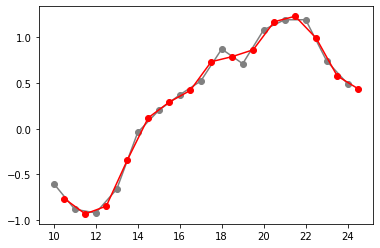

In [57]:
plt.plot(months[10:25],ssta[10:25],label='original',color='0.5',marker='o')
plt.plot(new_months[10:25],ssta_interp[10:25],label='interpolated',color='red',marker='o')